# Book Recommendation System using Neural Networks
# coding: utf-8
 
Group 5
Anas Mohammad - 50322515
Vijaya Ranjan Arra - 50319051


Over the past few decades, with the emergence of platforms such as YouTube, Amazon, and Netflix, recommender systems have become increasingly integral to our online experiences.

Our project focuses on the development of an innovative Book Recommendation System using Neural Networks to cater to individual user preferences. The primary objective is to elevate user engagement by delivering personalized book suggestions based on historical user ratings.


In [1]:
#importing all important libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings

from keras.layers import Input, Embedding, Flatten, Dot, Dense
from keras.models import Model

warnings.filterwarnings('ignore')
%matplotlib inline

<a id="1"></a> 
## Loading in data

In [2]:
dataset = pd.read_csv('./ratings.csv')

In [3]:
dataset.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [4]:
dataset.shape

(981756, 3)

In [5]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2, random_state=42)

In [6]:
train.head()

,book_id,user_id,rating
341848,3423,4608,2
964349,9811,36373,5
645459,6485,2957,4
74960,750,42400,3
358670,3591,36886,5


In [7]:
test.head()

,book_id,user_id,rating
646451,6495,19643,5
614851,6175,8563,4
974393,9920,52110,3
21471,215,33864,5
272540,2728,16587,3


In [8]:
no_of_users = len(dataset.user_id.unique())
no_of_users

53424

In [9]:
no_of_books = len(dataset.book_id.unique())
no_of_books

10000

In [10]:

# creating book embedding path
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(no_of_books+1, 5, name="Book-Embedding")(book_input)
book_vec = Flatten(name="Flatten-Books")(book_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(no_of_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# performing dot product and creating model
prod = Dot(name="Dot-Product", axes=1)([book_vec, user_vec])
model = Model([user_input, book_input], prod)
model.compile('adam', 'mean_squared_error')

In [11]:
from keras.models import load_model

if os.path.exists('regression_model.h5'):
    model = load_model('regression_model.h5')
else:
    history = model.fit([train.user_id, train.book_id], train.rating, epochs=5, verbose=1)
    model.save('regression_model.h5')
    plt.plot(history.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")

In [12]:
model.evaluate([test.user_id, test.book_id], test.rating)

6136/6136 [==============================] - 2s 265us/step - loss: 1.2023


1.2023398876190186

In [13]:
predictions = model.predict([test.user_id.head(10), test.book_id.head(10)])

[print(predictions[i], test.rating.iloc[i]) for i in range(0,10)]

1/1 [==============================] - 0s 27ms/step
[5.04932] 5
[4.0421815] 4
[3.2991488] 3
[4.3527007] 5
[3.3761344] 3
[3.8030398] 3
[3.3305159] 3
[4.8364267] 4
[4.5035343] 3
[4.079461] 5


[None, None, None, None, None, None, None, None, None, None]

## Creating Neural Network
Neural Networks proved there effectiveness for almost every machine learning problem as of now and they also perform exceptionally well for recommendation systems.  can be updated continuously as new ratings and user interactions become available. This allows the model to adapt to changing user preferences over time.


In [14]:
from keras.layers import Concatenate

# creating book embedding path
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(no_of_books+1, 5, name="Book-Embedding")(book_input)
book_vec = Flatten(name="Flatten-Books")(book_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(no_of_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# concatenate features
concat = Concatenate()([book_vec, user_vec])

# add fully-connected-layers
fc1 = Dense(128, activation='relu')(concat)
fc2 = Dense(32, activation='relu')(fc1)
out = Dense(1)(fc2)

# Create model and compile it
model2 = Model([user_input, book_input], out)
model2.compile('adam', 'mean_squared_error')

In [15]:
from keras.models import load_model

if os.path.exists('regression_model2.h5'):
    model2 = load_model('regression_model2.h5')
else:
    history = model2.fit([train.user_id, train.book_id], train.rating, epochs=5, verbose=1)
    model2.save('regression_model2.h5')
    plt.plot(history.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")

In [16]:
model2.evaluate([test.user_id, test.book_id], test.rating)

6136/6136 [==============================] - 2s 288us/step - loss: 0.7108


0.7107831239700317

In [17]:
predictions = model2.predict([test.user_id.head(10), test.book_id.head(10)])

[print(predictions[i], test.rating.iloc[i]) for i in range(0,10)]

1/1 [==============================] - 0s 21ms/step
[4.9610415] 5
[3.8096247] 4
[3.2002895] 3
[3.9204485] 5
[3.4903939] 3
[3.5268338] 3
[3.6338775] 3
[4.874812] 4
[4.1070814] 3
[4.1384783] 5


[None, None, None, None, None, None, None, None, None, None]

<a id="4"></a> 
## Visualizing Embeddings
Embeddings are weights that are learned to represent some specific variable like books and user in our case and therefore we can not only use them to get good results on our problem but also to extract inside about our data. Visualizing these embeddings can provide a more intuitive understanding of how the model perceives and groups similar entities.

In [18]:
# Extracting embeddings
book_em = model.get_layer('Book-Embedding')
book_em_weights = book_em.get_weights()[0]

In [19]:
book_em_weights[:5]

array([[-4.9531352e-02,  1.8961374e-02, -4.9593300e-04, -1.7894827e-02,
        -2.3208762e-02],
       [ 1.1459098e+00, -1.7304559e+00,  4.2627752e-01, -1.6664401e+00,
        -1.3000040e+00],
       [ 1.0651648e+00, -1.6073189e+00,  7.7902150e-01, -1.4951887e+00,
        -1.5249640e+00],
       [ 1.1340013e+00, -1.4331979e+00,  7.3318702e-01, -1.2981284e+00,
        -3.8168475e-01],
       [ 6.0393429e-01, -1.5227058e+00,  1.4613968e+00, -1.6250765e+00,
        -1.6208379e+00]], dtype=float32)

<Axes: >

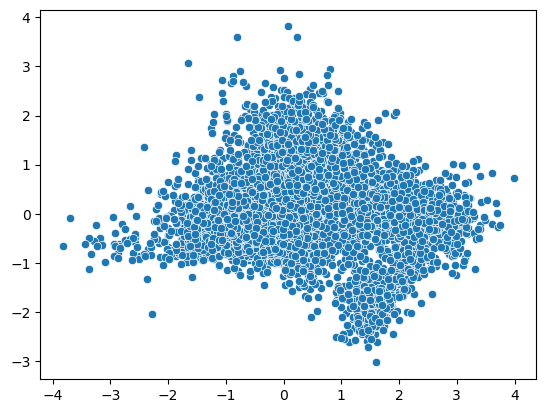

In [20]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
pca_result = pca.fit_transform(book_em_weights)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])

In [21]:
book_em_weights = book_em_weights / np.linalg.norm(book_em_weights, axis = 1).reshape((-1, 1))
book_em_weights[0][:10]
np.sum(np.square(book_em_weights[0]))

1.0

<Axes: >

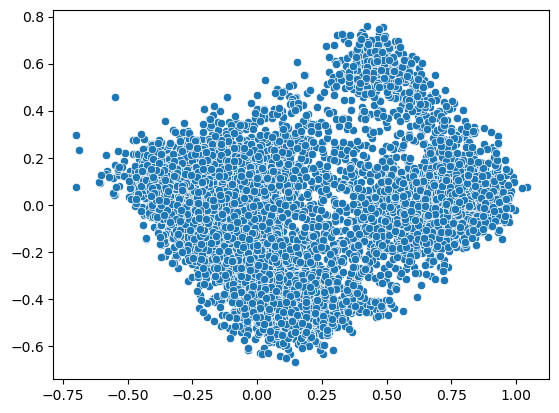

In [22]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(book_em_weights)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])

In [23]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tnse_results = tsne.fit_transform(book_em_weights)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10001 samples in 0.003s...
[t-SNE] Computed neighbors for 10001 samples in 0.261s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10001
[t-SNE] Computed conditional probabilities for sample 2000 / 10001
[t-SNE] Computed conditional probabilities for sample 3000 / 10001
[t-SNE] Computed conditional probabilities for sample 4000 / 10001
[t-SNE] Computed conditional probabilities for sample 5000 / 10001
[t-SNE] Computed conditional probabilities for sample 6000 / 10001
[t-SNE] Computed conditional probabilities for sample 7000 / 10001
[t-SNE] Computed conditional probabilities for sample 8000 / 10001
[t-SNE] Computed conditional probabilities for sample 9000 / 10001
[t-SNE] Computed conditional probabilities for sample 10000 / 10001
[t-SNE] Computed conditional probabilities for sample 10001 / 10001
[t-SNE] Mean sigma: 0.032905
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.143311
[t-SNE] KL

<Axes: >

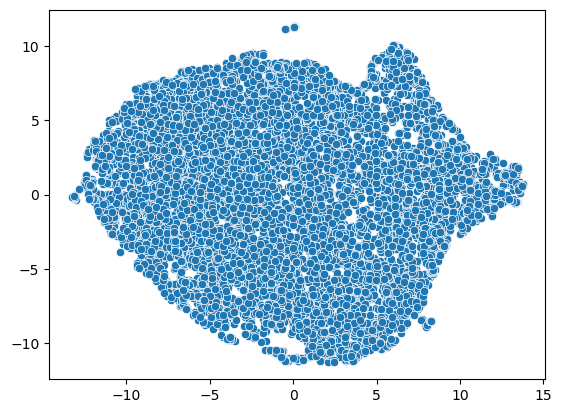

In [24]:
sns.scatterplot(x=tnse_results[:,0], y=tnse_results[:,1])

<a id="5"></a> 
## Making Recommendations

In [25]:
# Creating dataset for making recommendations for the first user
book_data = np.array(list(set(dataset.book_id)))
book_data[:5]

array([1, 2, 3, 4, 5])

In [26]:
user = np.array([1 for i in range(len(book_data))])
user[:5]

array([1, 1, 1, 1, 1])

In [27]:
predictions = model.predict([user, book_data])

predictions = np.array([a[0] for a in predictions])

recommended_book_ids = (-predictions).argsort()[:5]

recommended_book_ids

313/313 [==============================] - 0s 319us/step


array([7062, 9982, 9805, 7843, 9517])

In [28]:
# print predicted scores
predictions[recommended_book_ids]

array([5.03017  , 5.0301323, 5.0178547, 4.9011087, 4.7773595],
      dtype=float32)

In [29]:
books = pd.read_csv('./books.csv')
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [30]:
books[books['id'].isin(recommended_book_ids)]

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
7061,7062,12743472,12743472,17882885,27,1408319462,9.781408e+12,Teri Terry,2012.0,Slated,...,17404,19805,2404,272,868,3661,7489,7515,https://images.gr-assets.com/books/1453582609m...,https://images.gr-assets.com/books/1453582609s...
7842,7843,17182421,17182421,21762912,49,778315339,9.780778e+12,Jason Mott,2013.0,The Returned,...,11449,13269,2452,581,2122,5100,3798,1668,https://images.gr-assets.com/books/1372089735m...,https://images.gr-assets.com/books/1372089735s...
9516,9517,17810,17810,856346,39,NaN,9.780143e+12,"Ryū Murakami, Ralph McCarthy",1997.0,イン ザ・ミソスープ,...,9285,11545,950,313,1107,3586,4346,2193,https://images.gr-assets.com/books/1309282509m...,https://images.gr-assets.com/books/1309282509s...
9804,9805,420734,420734,1784677,38,671027581,9.780671e+12,Linda Howard,2001.0,Open Season,...,14653,15580,705,156,588,3505,6043,5288,https://images.gr-assets.com/books/1324869940m...,https://images.gr-assets.com/books/1324869940s...
9981,9982,12444298,12444298,21900571,1,385344422,9.780385e+12,Karen Marie Moning,2016.0,Feverborn,...,11570,14194,1891,179,521,2308,4779,6407,https://images.gr-assets.com/books/1435195536m...,https://images.gr-assets.com/books/1435195536s...
